# IE582 Fall 2019 First Homework
## Fatih Kubilay Yavuz

I used Colab, so, handled the data from my drive
Here, I mount the drive to my colab local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Downloading data

In [2]:
import os
import glob
import shutil

zip_files=glob.glob("drive/My Drive/colab_datas/IE582Fall2019_data_files/*")
for zip_fi in zip_files:
    fn=zip_fi.split("/")[-1]
    shutil.copy(zip_fi, fn)
    !unzip $fn
[os.remove(i) for i in os.listdir() if i.endswith(".zip")]

Archive:  matches.zip
  inflating: matches.csv             
Archive:  bets.zip
  inflating: bets.csv                
Archive:  stats.zip
  inflating: stats.csv               
Archive:  booking.zip
  inflating: booking.csv             
Archive:  goals.zip
  inflating: goals.csv               


[None, None, None, None, None]

In [3]:
os.listdir()

['.config',
 'booking.csv',
 'drive',
 'matches.csv',
 'goals.csv',
 'bets.csv',
 'stats.csv',
 'sample_data']

### Importing necessary packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("paper")
sns.set_style("darkgrid")
pd.options.display.max_columns=None

### Reading data

In [5]:
bets=pd.read_csv("bets.csv")
goals=pd.read_csv("goals.csv")
booking=pd.read_csv("booking.csv")
matches=pd.read_csv("matches.csv")
stats=pd.read_csv("stats.csv")
bets.sample(10)

,match_id,odd_bookmakers,odd_epoch,variable,value
695256,164857,Expekt,1546654595,o+5.5,14.25
618788,163682,1xBet,1545658144,ah-1.5_2,1.41
712401,165761,ComeOn,1547054213,o+1.5,1.50
585964,162854,Unibet.it,1545550229,o+1.5,1.27
715172,165824,Tipsport.cz,1547133027,o+1.5,1.32
991206,174651,Betsafe,1549338421,bts_no,1.72
1897241,227530,Betago,1568261478,odd_2,2.70
2084932,228846,bwin.es,1569980725,bts_no,1.95
1999617,231241,888sport,1569306348,ah+1_1,1.05
640465,163723,Unibet.fr,1545853326,o+5.5,7.00


###### When we take a look at the data, there are na's in away and home scores, that's maybe because the matches continued at the time of the of the data crawling.

In [6]:
matches.isna().sum()

match_awayteam_id                   0
match_hometeam_id                   0
match_id                            0
epoch                               0
match_status                       95
match_live                          0
match_hometeam_name                 0
match_awayteam_name                 0
match_hometeam_score               95
match_awayteam_score               95
match_hometeam_halftime_score     457
match_awayteam_halftime_score     457
match_hometeam_extra_score        457
match_awayteam_extra_score        457
match_hometeam_penalty_score     5169
match_awayteam_penalty_score     5169
league_id                           0
dtype: int64

###### We first drop the nonfinished matches in order to perform the task.;

In [0]:
matches_wo_na=matches.loc[~(matches["match_hometeam_score"]).isna()|~(matches["match_awayteam_score"]).isna()]

In [0]:
home_scores=matches_wo_na["match_hometeam_score"].astype(int)
away_scores=matches_wo_na["match_awayteam_score"].astype(int)
home_away=(home_scores-away_scores).astype(int)

## Task 1 
##### First part 

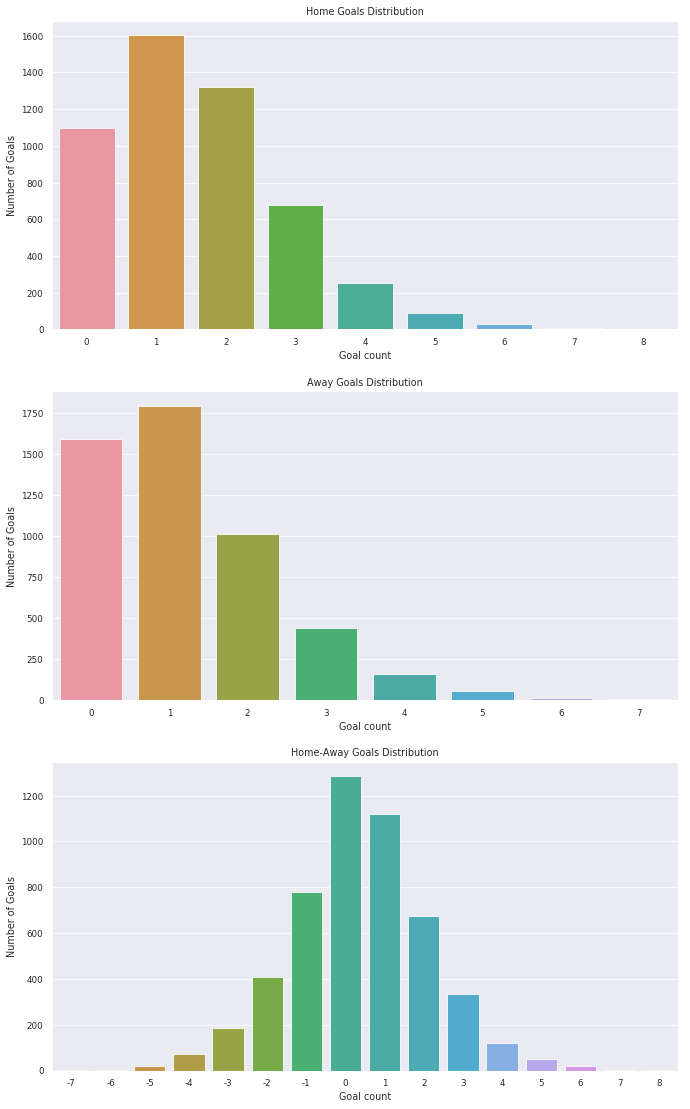

In [9]:
fig,ax=plt.subplots(3,figsize=(10,18))
for i in ax:
    i.set_xlabel("Goal count")
    i.set_ylabel("Number of Goals")
ax[0].set_title("Home Goals Distribution")
ax[1].set_title("Away Goals Distribution")
ax[2].set_title("Home-Away Goals Distribution")
sns.barplot(x=home_scores.value_counts().index,y=home_scores.value_counts().values,ax=ax[0])
sns.barplot(x=away_scores.value_counts().index,y=away_scores.value_counts().values,ax=ax[1])
sns.barplot(x=home_away.value_counts().index,y=home_away.value_counts().values,ax=ax[2])

##### Second Part
###### As indicated the home and away goals fit on a poisson distribution perfectly, their difference fits on a normal distribution.

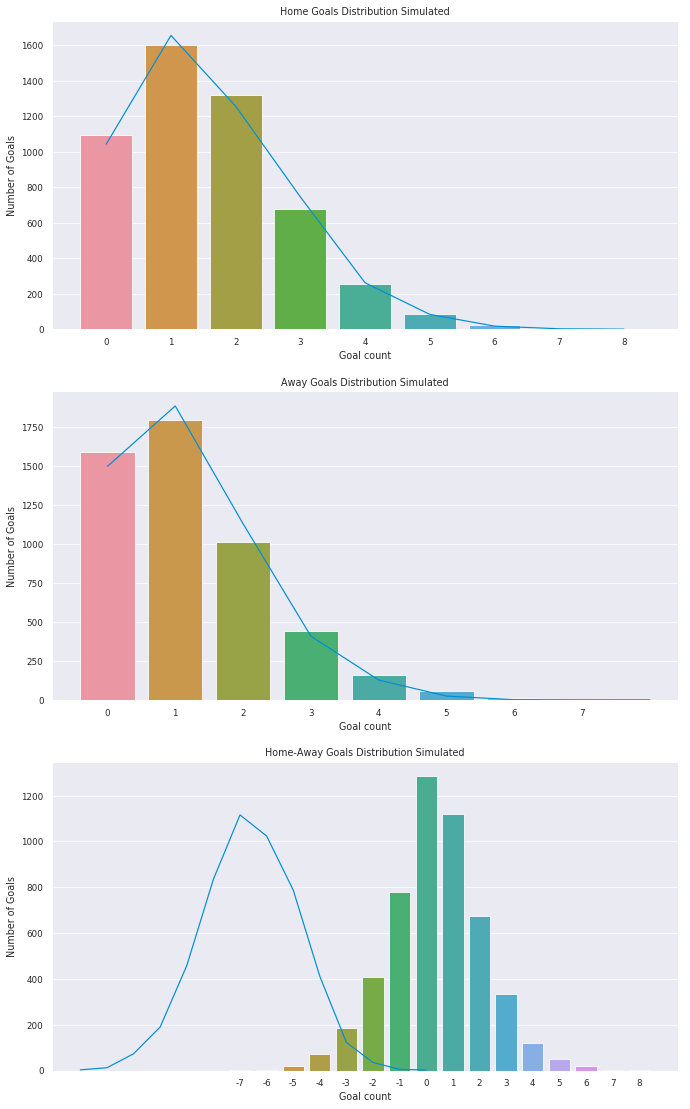

In [10]:
# Dont understand why doesnt distplot work
fig,ax=plt.subplots(3,figsize=(10,18))
for i in ax:
    i.set_xlabel("Goal count")
    i.set_ylabel("Number of Goals")
ax[0].set_title("Home Goals Distribution Simulated")
ax[1].set_title("Away Goals Distribution Simulated")
ax[2].set_title("Home-Away Goals Distribution Simulated")
sns.barplot(x=home_scores.value_counts().index,y=home_scores.value_counts().values,ax=ax[0])
sns.barplot(x=away_scores.value_counts().index,y=away_scores.value_counts().values,ax=ax[1])
sns.barplot(x=home_away.value_counts().index,y=home_away.value_counts().values,ax=ax[2])
for i,arr in enumerate([home_scores,away_scores]):
    home_poisson=np.random.poisson(arr.mean(), len(arr))
    unq,counts=np.unique(home_poisson,return_counts=True)
    sns.lineplot(x=unq,y=counts,ax=ax[i])
a=np.random.normal(home_away.mean(),home_away.std(),size=len(home_away))
a=pd.Series(a.round().astype(int))
sns.lineplot(x=a.value_counts().index,y=a.value_counts().values,ax=ax[2])

## Task 2
##### In the task, we were asked to choose at least 4 bookmakers, so i chose 4 bookmakers with the largest counts.

In [11]:
bets.odd_bookmakers.value_counts()[0:4]

1xBet          116980
18bet           74380
Marathonbet     67536
bet365          66482
Name: odd_bookmakers, dtype: int64

In [0]:
bookmakers=["1xBet","18bet","Marathonbet","bet365"]

###### Here we see there are more that one odd for one odd type. That's probably because, he indicated site is a live-betting site, and the odds are taken throught out the match.

In [13]:
bets.loc[(bets["odd_bookmakers"]=="10Bet")&(bets["variable"]=="odd_1")&(bets["match_id"]==242232)]

,match_id,odd_bookmakers,odd_epoch,variable,value
2024428,242232,10Bet,1569609019,odd_1,2.15
2029320,242232,10Bet,1569644964,odd_1,2.15
2061143,242232,10Bet,1569896139,odd_1,2.40
2085212,242232,10Bet,1569984446,odd_1,2.35
2102965,242232,10Bet,1570010872,odd_1,2.35


##### We see that some odd are 0 so, this causes probabilities to be infinity. Thus, I dropped the values with 0 odds

In [14]:
bets_mod=bets.loc[(bets["odd_bookmakers"].isin(bookmakers))&(bets["variable"].isin(["odd_1","odd_2","odd_x"]))]
bets_mod["probs"]=1/bets_mod["value"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
ids_tbd=bets_mod.loc[bets_mod["value"]==0]["match_id"].value_counts().index
bets_mod=bets_mod.loc[~bets_mod["match_id"].isin(ids_tbd)]
del bets_mod["odd_epoch"]
bets_mod.sample(10)

,match_id,odd_bookmakers,variable,value,probs
1553157,214330,bet365,odd_x,3.80,0.263158
1752173,227502,Marathonbet,odd_2,3.00,0.333333
1132494,181119,bet365,odd_2,3.25,0.307692
874776,171008,Marathonbet,odd_2,2.30,0.434783
1598919,236297,Marathonbet,odd_1,3.18,0.314465
347609,206169,18bet,odd_x,3.60,0.277778
260530,188739,Marathonbet,odd_2,6.10,0.163934
211,150842,1xBet,odd_x,3.70,0.270270
1075762,180586,Marathonbet,odd_x,3.35,0.298507
1141223,183821,1xBet,odd_2,13.00,0.076923


###### I pivoted the dataframe in order to ease the calculations, and plotting.

In [16]:
bets_pivoted=pd.pivot_table(bets_mod,values=["value","probs"],columns=["variable"],index=["match_id","odd_bookmakers"]).reset_index()
bets_pivoted.columns=["match_id","odd_bookmakers","probs_1","probs_2","probs_x","value_1","value_2","value_x"]
bets_pivoted["probs_2"]=bets_pivoted["probs_2"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["probs_1"]=bets_pivoted["probs_1"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["probs_x"]=bets_pivoted["probs_x"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["home_minus_away"]=bets_pivoted["probs_1"]-bets_pivoted["probs_2"]
bets_pivoted.head()

,match_id,odd_bookmakers,probs_1,probs_2,probs_x,value_1,value_2,value_x,home_minus_away
0,145899,18bet,0.178947,0.625059,0.224355,5.35,1.43,4.30,-0.446113
1,145899,1xBet,0.153083,0.647655,0.207835,6.45,1.49,4.76,-0.494572
2,145899,Marathonbet,0.130011,0.669958,0.208340,7.60,1.44,4.75,-0.539947
3,145899,bet365,0.175462,0.632184,0.215777,5.50,1.44,4.50,-0.456722
4,145900,18bet,0.449293,0.317232,0.265994,2.06,2.82,3.60,0.132061


###### Get only Draw matches from match_id

In [0]:
matches_finished_draw=matches_wo_na.loc[matches_wo_na["match_hometeam_score"]==matches_wo_na["match_awayteam_score"]]["match_id"].values
bets_pivoted=bets_pivoted.loc[bets_pivoted["match_id"].isin(matches_finished_draw)].reset_index(drop=True)

###### The plot of the "Home win"-"Away win" and "Draw" probabilities for each bookmakers I chose

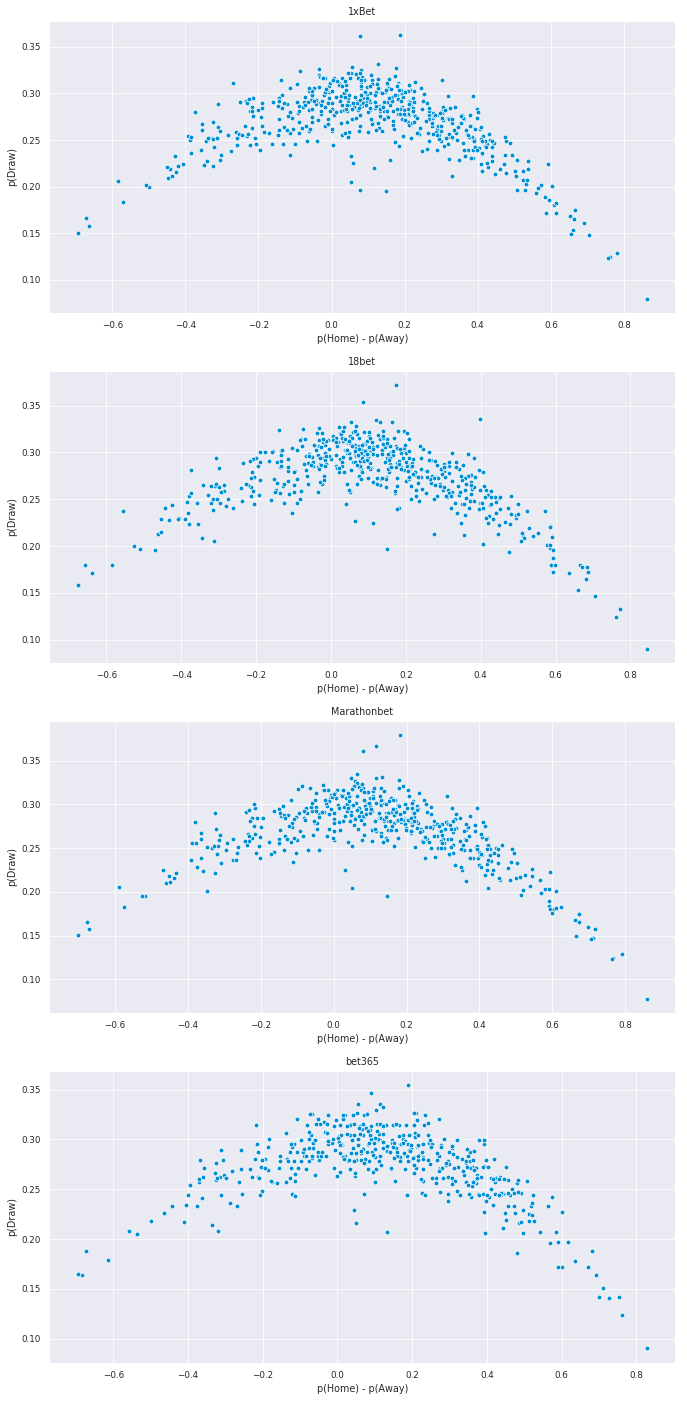

In [18]:
_,axx=plt.subplots(4,figsize=(10,23))
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted.loc[bets_pivoted["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away"], y=bm_bets["probs_x"],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

###### The plots after we discretize the "Home win" - "Away win" probability for each bookmakers I chose.

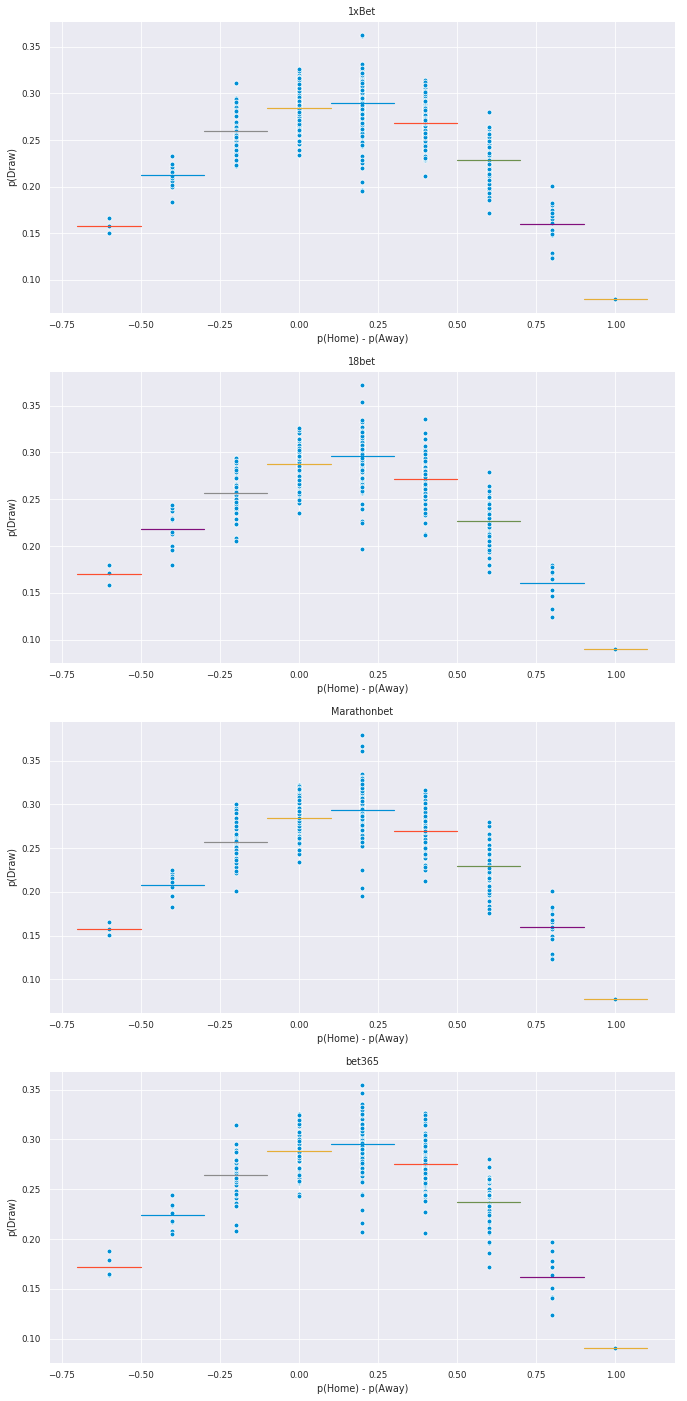

In [19]:
bets_pivoted["home_minus_away_disc"]=bets_pivoted["home_minus_away"].apply(lambda x:-0.8 if -1<x<=-0.8 
                                            else -0.6 if -0.8<x<=-0.6
                                            else -0.4 if -0.6<x<=-0.4
                                            else -0.2 if -0.4<x<=-0.2
                                            else 0 if -0.2<x<=0
                                            else 0.2 if 0<x<=0.2
                                            else 0.4 if 0.2<x<=0.4
                                            else 0.6 if 0.4<x<=0.6
                                            else 0.8 if 0.6<x<=0.8
                                            else 1)
_,axx=plt.subplots(4,figsize=(10,23))
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted.loc[bets_pivoted["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        mean_=bm_bets.loc[bm_bets["home_minus_away_disc"]==prob]["probs_x"].mean()
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[mean_,mean_],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

###### Observing the plots, I don't think there is bias because in every bin, matches are evenly distributed in the both under and above the mean. Also, betting to the matches near 0 prob of Home- Away seemed more reasonable to me.

## Task 3


###### Here there are 283 matches, that a result-changing goal happened in the overtime.  

In [20]:
outlier_goals=goals.loc[goals["time"].str.contains("90\+")].time.value_counts().index.tolist()
goals_mod=goals.loc[goals["time"].isin(outlier_goals)]
goals_mod["diff"]=goals_mod["score"].apply(lambda x: int(x.split(" - ")[1])-int(x.split(" - ")[0]))
goals_mod=goals_mod.loc[goals_mod["diff"].isin([-1,0,1])]
goals_mod.head()
# 283 mac var bu olayın oldugu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,match_id,time,home_scorer,score,away_scorer,diff
13,13450,90+5,Bamba S.,1 - 1,NaN,0
125,45381,90+1,Mezenga B.,1 - 1,NaN,0
150,41181,90+4,NaN,0 - 1,Sanabria A.,1
153,41184,90+2,Garcia R.,1 - 2,NaN,1
241,24573,90+4,NaN,1 - 1,Freuler R.,0


###### There are 44 matches that happened a red card in the first 20 minutes of a match. The reason why I chose 20 minutes is that in that interval, the players still thinks that the matches has yet started. Thus, getting the impression of they got a red card at the starting of the game instead of in the middle of the game. 

###### Also, there is live-betting odds in the data, so a team getting a red card in the specified time interval would cause that team's winning or draw odds to increase thus lowering the probabilities.

In [21]:
booking["whos_fault"]=np.where(booking["home_fault"].isna(),"away","home") # this wasnt necessary but i wanted to keep it anyway
booking_mod=booking.drop(booking.loc[booking["time"].str.contains("\+")].index)
booking_mod=booking_mod.loc[(booking_mod["time"].astype(int)<20)&(booking_mod["card"]=="red card")]
booking_mod.head()
# 44 mac var bu olayın oldugu

,match_id,time,home_fault,card,away_fault,whos_fault
436,13422,15,NaN,red card,Coady C.,away
867,13392,4,NaN,red card,Loovens G.,away
1690,62475,11,NaN,red card,Arnold M.,away
1900,63816,9,NaN,red card,Felipe,away
2320,66293,7,NaN,red card,Torunarigha J.,away


In [22]:
# matches concated
unq_match_outlier=booking_mod["match_id"].values.astype(int).tolist()
for i in goals_mod["match_id"].values:
    unq_match_outlier.append(i)
unq_match_outlier=np.unique(unq_match_outlier)
unq_match_outlier

array([ 13278,  13296,  13392,  13402,  13420,  13422,  13450,  16479,
        16498,  16503,  17633,  24569,  24573,  30338,  41181,  41184,
        45246,  45255,  45257,  45263,  45274,  45284,  45338,  45356,
        45363,  45369,  45381,  55266,  58518,  58522,  59088,  59093,
        59101,  59627,  62475,  62477,  62483,  63001,  63011,  63408,
        63572,  63578,  63816,  64442,  64757,  64884,  66081,  66293,
        66303,  66530,  66802,  67049,  67259,  67756,  67770,  67896,
        68013,  68062,  68390,  69167,  69171,  69437,  69519,  69913,
        70208,  70291,  70547,  70553,  70820,  71626,  71645,  71956,
        73426,  74244,  74250,  75082,  75891,  77033,  77164,  78130,
        78572,  79347,  79348,  79929,  81154,  81778,  81844,  81847,
        81851,  81856,  82561,  83075,  83801,  83804,  86312,  88134,
        89096,  89629,  89649,  91795,  91797,  92561,  94272,  94284,
        96789,  96800,  97644,  98128,  98598,  98608,  98614,  99342,
      

###### All of them combines of 311 matches. 

In [23]:
len(unq_match_outlier)
# sadece 311 mac var

311

###### I still don't think there is a bias, because still, for a bin the matches are nearly evenly distributed. So, there isn't much significant change in the results.

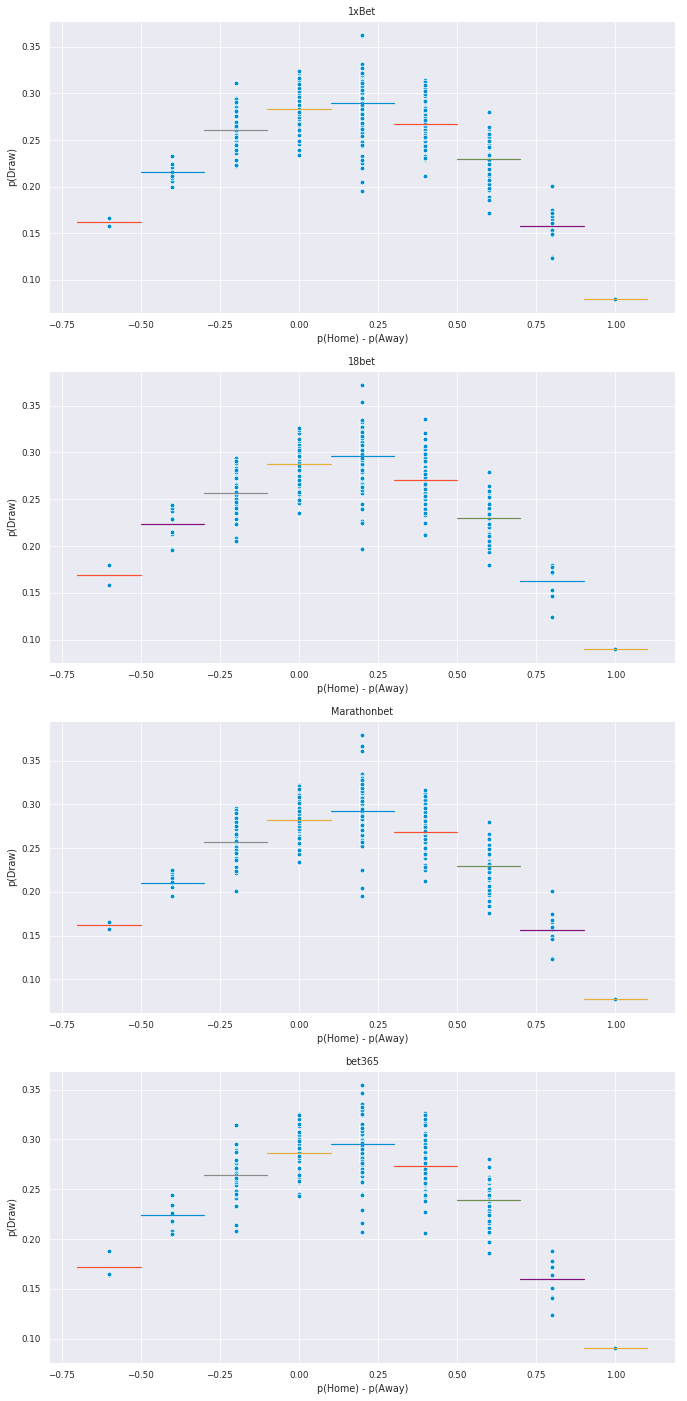

In [24]:
_,axx=plt.subplots(4,figsize=(10,23))
bets_pivoted_n=bets_pivoted.loc[~bets_pivoted["match_id"].isin(unq_match_outlier)]
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted_n.loc[bets_pivoted_n["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        mean_=bm_bets.loc[bm_bets["home_minus_away_disc"]==prob]["probs_x"].mean()
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[mean_,mean_],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

Here you see the outlier matches plots.

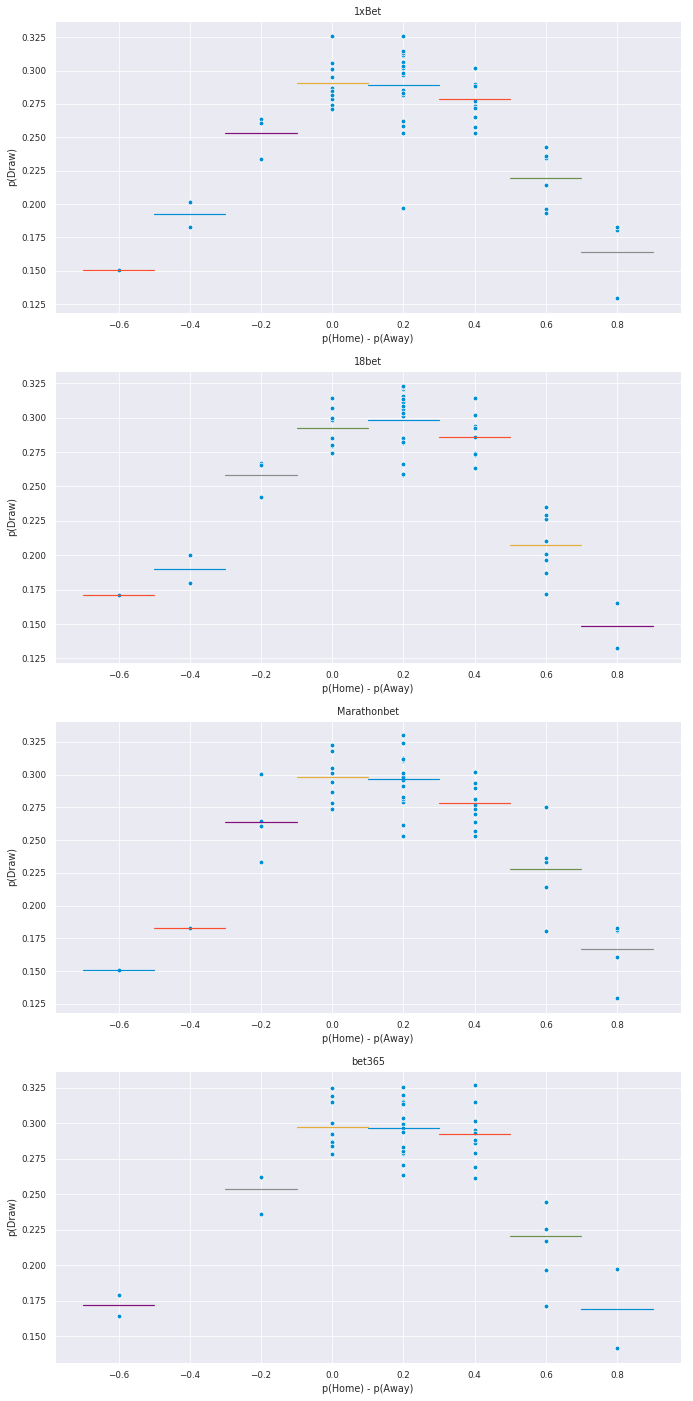

In [25]:
_,axx=plt.subplots(4,figsize=(10,23))
bets_pivoted_n=bets_pivoted.loc[bets_pivoted["match_id"].isin(unq_match_outlier)]
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted_n.loc[bets_pivoted_n["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        mean_=bm_bets.loc[bm_bets["home_minus_away_disc"]==prob]["probs_x"].mean()
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[mean_,mean_],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")